<div class="alert alert-block alert-success">
    
# Data Integration And Reshaping
Environment: Python 3.9.12

</div>

<div class="alert alert-block alert-danger">
    
## Table of Contents

</div>    

[1. Introduction](#Intro) <br>
[2. Importing Libraries](#libs) <br>
[3. Examining Review Files](#examine) <br>
[4. Task 1 Data Integration](#load) <br>
$\;\;\;\;$[4.1. Matching Suburb](#Reg_Exp) <br>
$\;\;\;\;$[4.2. Over Priced](#Read) <br>
$\;\;\;\;$[4.3. Finding Crime Types Average](#latin) <br>
$\;\;\;\;\;\;\;\;$[4.3.1. Crime A](#a) <br>
$\;\;\;\;\;\;\;\;$[4.3.2. Crime B](#b) <br>
$\;\;\;\;\;\;\;\;$[4.3.3. Crime C](#c) <br>
$\;\;\;\;$[4.4. Finding train station ID](#id) <br>
$\;\;\;\;$[4.5. Finding Distance to train station](#dis) <br>
[5. Writing to an CSV File](#write) <br>
[6. Task 2 Data Reshaping](#reshape) <br>
$\;\;\;\;$[6.1. Cleansing data](#cleanse) <br>
$\;\;\;\;$[6.2. Standardisation](#stada) <br>
$\;\;\;\;$[6.3. Min-Max Normalisation](#minmax) <br>
$\;\;\;\;$[6.4. Data Transformation](#trans) <br>
$\;\;\;\;\;\;\;\;$[6.4.1. Root Transformation](#t1) <br>
$\;\;\;\;\;\;\;\;$[6.4.2. Square Power Transformation](#t2) <br>
$\;\;\;\;\;\;\;\;$[6.4.3. Log Transformation](#t3) <br>
$\;\;\;\;$[6.5. Testing Linear Model](#linear) <br>
[7. Summary](#sum) <br>
[8. References](#Ref) <br>

<div class="alert alert-block alert-warning">

## 1.  Introduction  <a class="anchor" name="Intro"></a>
    
</div>

This assessment regards data integration and data reshaping about property information in Victoria using various provided data formats. The csv file included general information about Victoria's houses such as address, types, rooms, age, locations. Additonally, other datasets were council .txt file which gave the council's names in the suburb; the canlendar, train stations, transportation information in Victoria were provided in gtfs files; locations of each suburb were given in vic_suburb_boundary file. By using these datasets, this assessment is going to find the matching information in each area and analyse the values in data reshaping part applying linear model on the property's price.

-----------

<div class="alert alert-block alert-warning">
    
## 2.  Importing Libraries  <a class="anchor" name="libs"></a>
 </div>

There are some necessary libraries in this assessment:

* **pandas:** to manipulate data analysis, associate of tabular data in DataFrames
* **geopandas:** to work with geospatial data as dataframe
* **shapely.geometry:** to manipulate and analyse of planar geometric objects
* **matplotlib:** to visualise data
* **numpy:** to work with arrays and use needed algebra 
* **sklearn.metrics:** to import metrics for evaluating model
* **sklearn.linear_model:** to  import linear fuction
* **sklearn.model_selection:** to import train_test_split function for splitting dataset into training set and testing set

In [1]:
#Libraries to manipulate datasets as dataframes (csv, txt and shapefiles)
import pandas as pd
from pandas import DataFrame
import geopandas as gpd
from shapely.geometry import Point

#Libraries for visualisations 
%matplotlib inline
from matplotlib import pyplot as plt

# Library to work with arrays and linear algebra 
import numpy as np

# Use some important algebra
from math import radians, cos, sin, asin, sqrt

# Library to process abstract syntax grammar
import ast

#Libraries for importing linear functions, necessary metrics to evaluate models
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

---------------------------------------

<div class="alert alert-block alert-warning">

## 3.  Examining Review Files <a class="anchor" name="examine"></a>

 </div>

First of all, the codes in this part is going to explore main files used in this assessment 

In [2]:
# Load shapefiles 
# This is the pathway of shapefiles after downloading from shared Drives
# This shapefile will be in a folder called vic_suburb_boundary
shapefile = 'vic_suburb_boundary/VIC_LOCALITY_POLYGON_shp.shp'

In [3]:
# Read the shapefile within vic_suburb_boundary folder 
map_df = gpd.read_file(shapefile)
map_df.head()

,LC_PLY_PID,DT_CREATE,DT_RETIRE,LOC_PID,VIC_LOCALI,VIC_LOCA_1,VIC_LOCA_2,VIC_LOCA_3,VIC_LOCA_4,VIC_LOCA_5,VIC_LOCA_6,VIC_LOCA_7,geometry
0,6670,2011-08-31,None,VIC2615,2012-04-27,None,UNDERBOOL,None,None,G,None,2,"POLYGON ((141.74552 -35.07229, 141.74552 -35.0..."
1,6671,2011-08-31,None,VIC1986,2012-04-27,None,NURRAN,None,None,G,None,2,"POLYGON ((148.66877 -37.39571, 148.66876 -37.3..."
2,6672,2011-08-31,None,VIC2862,2012-04-27,None,WOORNDOO,None,None,G,None,2,"POLYGON ((142.92288 -37.97886, 142.90449 -37.9..."
3,6673,2011-08-31,None,VIC734,2017-08-09,None,DEPTFORD,None,None,G,None,2,"POLYGON ((147.82336 -37.66001, 147.82313 -37.6..."
4,6674,2011-08-31,None,VIC2900,2012-04-27,None,YANAC,None,None,G,None,2,"POLYGON ((141.27978 -35.99859, 141.27989 -35.9..."


In [4]:
# Next, load the provided csv file
list_location = pd.read_csv('data.csv')
list_location.head(3)

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude
0,ID982596088,43 Rowland St,7,h,4050000.0,12/08/2017,4.0,2.0,725.0,42.0,-37.81185,145.05387
1,ID272585119,19 Newry St,3,h,1320000.0,28/05/2016,1.0,0.0,365.0,5.0,-37.85540,145.00010
2,ID741031646,13 Tanjil Ct,3,h,590500.0,29/07/2017,1.0,1.0,585.0,9.0,-37.67681,145.00323


In [5]:
# Read Crime Excel file 
df_crime = pd.read_excel('crimebylocation.xlsx', sheet_name = 'Table 1')
df_crime.tail(3)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
9101,NaN,2016,4 Western,WARRNAMBOOL,WARRNAMBOOL,F Other offences,F20 Transport regulation offences,2,33795,6053355
9102,NaN,2016,4 Western,WARRNAMBOOL,WARRNAMBOOL,F Other offences,F30 Other government regulatory offences,4,33795,6053355
9103,NaN,2016,4 Western,WARRNAMBOOL,WARRNAMBOOL,F Other offences,F90 Miscellaneous offences,1,33795,6053355


In [6]:
# Load all txt files in gtfs to find train stations and distances
#After downloading, the gtfs file contains 2 more folders inside
#which are 1 and 2 

# Firstly, create all txt file paths in gtfs - 1 
routes1 = 'gtfs/1/routes.txt'

shapes1 = 'gtfs/1/shapes.txt'

stops1 = 'gtfs/1/stops.txt'

stop_times1 = 'gtfs/1/stop_times.txt'

trips1 = 'gtfs/1/trips.txt'


# Secondly, load all txt files paths in gtfs - 2
routes2 = 'gtfs/2/routes.txt'

shapes2 = 'gtfs/2/shapes.txt'

stops2 = 'gtfs/2/stops.txt'

stop_times2 = 'gtfs/2/stop_times.txt'

trips2 = 'gtfs/2/trips.txt'

In [7]:
# Load all txt files in folder 1 
df1 = pd.read_csv(routes1, delimiter= ",")
df1_1 = pd.read_csv(shapes1, delimiter= ",")
df1_2 = pd.read_csv(stops1, delimiter= ",")
df1_3 = pd.read_csv(stop_times1, delimiter= ",")
df1_4 = pd.read_csv(trips1, delimiter= ",")

In [8]:
# Load all txt files in folder 2
df2 = pd.read_csv(routes2, delimiter= ",")
df2_1 = pd.read_csv(shapes2, delimiter= ",")
df2_2 = pd.read_csv(stop_times2, delimiter= ",")
df2_3 = pd.read_csv(stops2, delimiter= ",")
df2_4 = pd.read_csv(trips2, delimiter= ",")

<div class="alert alert-block alert-warning"> 

## 4.  Task 1 Data Integration <a class="anchor" name="load"></a>

</div>

<div class="alert alert-block alert-info">
    
### 4.1. Matching Suburb  <a class="anchor" name="Reg_Exp"></a>

This part will match the corresponding suburbs in shapefiles with locations (lattitude and longtitude) using geopandas library 

In [9]:

#Changing to a GeoDataFrame to create geometry series
list_location_gp = gpd.GeoDataFrame(list_location, geometry=gpd.points_from_xy(list_location.Longtitude,list_location.Lattitude))

list_location_gp.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,geometry
0,ID982596088,43 Rowland St,7,h,4050000.0,12/08/2017,4.0,2.0,725.0,42.0,-37.81185,145.05387,POINT (145.05387 -37.81185)
1,ID272585119,19 Newry St,3,h,1320000.0,28/05/2016,1.0,0.0,365.0,5.0,-37.85540,145.00010,POINT (145.00010 -37.85540)
2,ID741031646,13 Tanjil Ct,3,h,590500.0,29/07/2017,1.0,1.0,585.0,9.0,-37.67681,145.00323,POINT (145.00323 -37.67681)
3,ID375541301,1/5 Farringdon St,3,t,790000.0,12/11/2016,3.0,1.0,291.0,10.0,-37.72710,144.92610,POINT (144.92610 -37.72710)
4,ID318913801,137 Gold St,2,h,1000000.0,20/05/2017,1.0,0.0,193.0,49.0,-37.79360,144.98990,POINT (144.98990 -37.79360)


In [10]:
# Iterate each data in geometry column and match with 'VIC_LOCA_2' column in shapefile
list_location_gp['Suburb'] = ''
for idx in range(map_df.shape[0]):
    #For every address, find if they reside within a suburb
    pip = list_location_gp.within(map_df.loc[idx, 'geometry'])
    if pip.sum() > 0: #we found where some of the addresses reside at map_df.loc[idx]
        list_location_gp.loc[pip, 'Suburb']  = map_df.loc[idx, 'VIC_LOCA_2']

list_location_gp.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,geometry,Suburb
0,ID982596088,43 Rowland St,7,h,4050000.0,12/08/2017,4.0,2.0,725.0,42.0,-37.81185,145.05387,POINT (145.05387 -37.81185),KEW
1,ID272585119,19 Newry St,3,h,1320000.0,28/05/2016,1.0,0.0,365.0,5.0,-37.85540,145.00010,POINT (145.00010 -37.85540),WINDSOR
2,ID741031646,13 Tanjil Ct,3,h,590500.0,29/07/2017,1.0,1.0,585.0,9.0,-37.67681,145.00323,POINT (145.00323 -37.67681),THOMASTOWN
3,ID375541301,1/5 Farringdon St,3,t,790000.0,12/11/2016,3.0,1.0,291.0,10.0,-37.72710,144.92610,POINT (144.92610 -37.72710),PASCOE VALE
4,ID318913801,137 Gold St,2,h,1000000.0,20/05/2017,1.0,0.0,193.0,49.0,-37.79360,144.98990,POINT (144.98990 -37.79360),CLIFTON HILL


In [11]:
# Copy the dataframe
df_suburb = list_location_gp.copy()

In [12]:
# Remove unnecessary column
df_suburb = df_suburb.drop(['geometry'], axis=1)
# Look at result after finding Suburb names 
df_suburb.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb
0,ID982596088,43 Rowland St,7,h,4050000.0,12/08/2017,4.0,2.0,725.0,42.0,-37.81185,145.05387,KEW
1,ID272585119,19 Newry St,3,h,1320000.0,28/05/2016,1.0,0.0,365.0,5.0,-37.85540,145.00010,WINDSOR
2,ID741031646,13 Tanjil Ct,3,h,590500.0,29/07/2017,1.0,1.0,585.0,9.0,-37.67681,145.00323,THOMASTOWN
3,ID375541301,1/5 Farringdon St,3,t,790000.0,12/11/2016,3.0,1.0,291.0,10.0,-37.72710,144.92610,PASCOE VALE
4,ID318913801,137 Gold St,2,h,1000000.0,20/05/2017,1.0,0.0,193.0,49.0,-37.79360,144.98990,CLIFTON HILL


<div class="alert alert-block alert-info">
    
### 4.2. Over Priced  <a class="anchor" name="Reg_Exp"></a>

This part will implement how to find boolean values in over_priced? column by calculating median values of each suburb groups and then compare these median values to original price of each house.

In [13]:
# Create a column named 'year' with only containing year 
df_suburb["Date"] = pd.to_datetime(df_suburb["Date"])
df_suburb['year'] = df_suburb['Date'].dt.strftime('%Y')

/Users/vyvy/opt/anaconda3/envs/FIT5196/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '28/05/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/vyvy/opt/anaconda3/envs/FIT5196/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '29/07/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/vyvy/opt/anaconda3/envs/FIT5196/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '20/05/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/vyvy/opt/anaconda3/envs/FIT5196/lib/python3.9/site-packages/pandas/core/tools/dat

In [14]:
#Group all required columns for each type of house and find median values  
similar_properties = df_suburb.groupby(['Rooms', 'Bathroom', 'Car', 'Type',
                                       'year'])['Price'].transform('median')

In [15]:
# Create a list containing median values 
median = similar_properties.to_list()

In [16]:
# Create a column with calculated median values 
df_suburb['median'] = median
df_suburb.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,year,median
0,ID982596088,43 Rowland St,7,h,4050000.0,2017-12-08,4.0,2.0,725.0,42.0,-37.81185,145.05387,KEW,2017,4050000.0
1,ID272585119,19 Newry St,3,h,1320000.0,2016-05-28,1.0,0.0,365.0,5.0,-37.85540,145.00010,WINDSOR,2016,1227500.0
2,ID741031646,13 Tanjil Ct,3,h,590500.0,2017-07-29,1.0,1.0,585.0,9.0,-37.67681,145.00323,THOMASTOWN,2017,832000.0
3,ID375541301,1/5 Farringdon St,3,t,790000.0,2016-12-11,3.0,1.0,291.0,10.0,-37.72710,144.92610,PASCOE VALE,2016,790000.0
4,ID318913801,137 Gold St,2,h,1000000.0,2017-05-20,1.0,0.0,193.0,49.0,-37.79360,144.98990,CLIFTON HILL,2017,1005000.0


In [17]:
#Compare to see if properties are over priced
conditions = [df_suburb['Price'] <= df_suburb['median'],
             df_suburb['Price'] > df_suburb['median']]

#Define choices
choices = ['False', 'True']

#Create a new columns to show the results 
df_suburb['over_priced?'] = np.select(conditions, choices)

#Display results 
df_suburb.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,year,median,over_priced?
0,ID982596088,43 Rowland St,7,h,4050000.0,2017-12-08,4.0,2.0,725.0,42.0,-37.81185,145.05387,KEW,2017,4050000.0,False
1,ID272585119,19 Newry St,3,h,1320000.0,2016-05-28,1.0,0.0,365.0,5.0,-37.85540,145.00010,WINDSOR,2016,1227500.0,True
2,ID741031646,13 Tanjil Ct,3,h,590500.0,2017-07-29,1.0,1.0,585.0,9.0,-37.67681,145.00323,THOMASTOWN,2017,832000.0,False
3,ID375541301,1/5 Farringdon St,3,t,790000.0,2016-12-11,3.0,1.0,291.0,10.0,-37.72710,144.92610,PASCOE VALE,2016,790000.0,False
4,ID318913801,137 Gold St,2,h,1000000.0,2017-05-20,1.0,0.0,193.0,49.0,-37.79360,144.98990,CLIFTON HILL,2017,1005000.0,False


In [18]:
# Drop unnecessary columns in the dataframe
df_suburb = df_suburb.drop(["year", "median"], axis=1)
df_suburb.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,over_priced?
0,ID982596088,43 Rowland St,7,h,4050000.0,2017-12-08,4.0,2.0,725.0,42.0,-37.81185,145.05387,KEW,False
1,ID272585119,19 Newry St,3,h,1320000.0,2016-05-28,1.0,0.0,365.0,5.0,-37.85540,145.00010,WINDSOR,True
2,ID741031646,13 Tanjil Ct,3,h,590500.0,2017-07-29,1.0,1.0,585.0,9.0,-37.67681,145.00323,THOMASTOWN,False
3,ID375541301,1/5 Farringdon St,3,t,790000.0,2016-12-11,3.0,1.0,291.0,10.0,-37.72710,144.92610,PASCOE VALE,False
4,ID318913801,137 Gold St,2,h,1000000.0,2017-05-20,1.0,0.0,193.0,49.0,-37.79360,144.98990,CLIFTON HILL,False


<div class="alert alert-block alert-info">
    
### 4.3. Finding Crime Types Average <a class="anchor" name="Reg_Exp"></a>

This part will find the crime average of each type, including type A, type B and type C. The crime information will be extracted in an Excel file named 'crimebylocation'. The Excel should be cleansed to make it become a good-looking dataframe before manipulating. Moreover, this part will also use council.txt file to match councils with suburb in Excel file.

In [19]:
# Find Crime average for each Type
# Read Crime Excel file 
df_crime = pd.read_excel('crimebylocation.xlsx', sheet_name = 'Table 1')


In [20]:
# Clean Excel file 
# Make it become a fitted format of data frame 
# Remove rows having null values (empty rows)
df_crime.dropna(axis=0, how='all', inplace=True)

In [21]:
# Remove columns having null values (empty columns)
df_crime.dropna(axis=1, how='all', inplace=True)

In [22]:
# Remove unnecessary rows or columns 
df_crime = df_crime.dropna(thresh=2)

In [23]:
# Turn the first row into column name 
headers = df_crime.iloc[0]
new_df  = pd.DataFrame(df_crime.values[1:], columns=headers)
new_df.head(3)

18,Apr - Mar reference period,Police Region,Police Service Area,Local Government Area,CSA Offence Division,CSA Offence Subdivision,Offence Count,LGA ERP,Victorian ERP
0,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A10 Homicide and related offences,4,123600,5632521
1,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A20 Assault and related offences,568,123600,5632521
2,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A30 Sexual offences,132,123600,5632521


In [24]:
# Check to see how many crime types in this file 
crime = new_df['CSA Offence Division']
crime.unique()

array(['A Crimes against the person', 'B Property and deception offences',
       'C Drug offences', 'D Public order and security offences',
       'E Justice procedures offences', 'F Other offences'], dtype=object)

In [25]:
# Convert and create a column only containing year 
df_suburb["Date"] = pd.to_datetime(df_suburb["Date"])
df_suburb['year'] = df_suburb['Date'].dt.strftime('%Y')

# Check to see how many years contain in the CSV data 
yr = df_suburb.year
yr.unique()

array(['2017', '2016'], dtype=object)

In [26]:
# Read council file with the purpose of creating a column having council, which can match in Crime data in Excel file
# Load the council text file
with open('councils.txt') as file:
    lines = file.read().upper()
l = lines.split("\n")
l[0]

# Make the council text file become a dictionary format to convert into data frame 
# Create an empty dictionary to store all values in council text file
dic = {}
for each in l:
    splitting = each.split(":")
    for item in range(len(splitting)):

        if item % 2==0:
            key = splitting[item]
        else:
            value = splitting[item].strip()
            value = ast.literal_eval(value)
    # Store council and subsub values in dictionary      
    dic[key] = value


In [27]:
# Create a data frame with long-form frame containg council and suburb
councils = (pd.DataFrame.from_dict(dic, orient='index').T.melt(var_name='council', value_name='Suburb'))
                                                                                              
councils.head()                                                                                                

,council,Suburb
0,BANYULE,ABBOTSFORD
1,BANYULE,AIRPORT WEST
2,BANYULE,ALBERT PARK
3,BANYULE,ALPHINGTON
4,BANYULE,None


In [28]:
# Merge council and suburb values 
merge_sub = pd.merge(df_suburb, councils, on='Suburb')
merge_sub.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,over_priced?,year,council
0,ID982596088,43 Rowland St,7,h,4050000.0,2017-12-08,4.0,2.0,725.0,42.0,-37.81185,145.05387,KEW,False,2017,SOUTH GIPPSLAND
1,ID217430869,16 Hodgson St,5,h,3450000.0,2017-08-26,2.0,2.0,668.0,13.0,-37.80795,145.01474,KEW,True,2017,SOUTH GIPPSLAND
2,ID797199418,47 Kellett Gr,4,h,2245000.0,2016-11-27,3.0,2.0,627.0,60.0,-37.79150,145.03480,KEW,True,2016,SOUTH GIPPSLAND
3,ID314412166,3/99 Earl St,2,t,707500.0,2016-07-26,1.0,1.0,124.0,27.0,-37.79380,145.03210,KEW,True,2016,SOUTH GIPPSLAND
4,ID721894683,15 Barry St,6,h,6500000.0,2016-08-13,6.0,3.0,1334.0,129.0,-37.80290,145.02670,KEW,False,2016,SOUTH GIPPSLAND


In [29]:
# Divide the dataframe into a smaller dataframe with only containing year of 2016 
sub_2016 = merge_sub[merge_sub['year'] == '2016']
sub_2016.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,over_priced?,year,council
2,ID797199418,47 Kellett Gr,4,h,2245000.0,2016-11-27,3.0,2.0,627.0,60.0,-37.7915,145.0348,KEW,True,2016,SOUTH GIPPSLAND
3,ID314412166,3/99 Earl St,2,t,707500.0,2016-07-26,1.0,1.0,124.0,27.0,-37.7938,145.0321,KEW,True,2016,SOUTH GIPPSLAND
4,ID721894683,15 Barry St,6,h,6500000.0,2016-08-13,6.0,3.0,1334.0,129.0,-37.8029,145.0267,KEW,False,2016,SOUTH GIPPSLAND
6,ID876342223,176 Peel St,5,h,2550000.0,2016-06-18,4.0,2.0,597.0,3.0,-37.7937,145.0353,KEW,False,2016,SOUTH GIPPSLAND
9,ID781602753,82 Parkhill Rd,3,h,1420000.0,2016-08-28,2.0,2.0,275.0,20.0,-37.8052,145.0489,KEW,True,2016,SOUTH GIPPSLAND


In [30]:
# Divide the dataframe into a smaller dataframe with only containing year of 2017
sub_2017 = merge_sub[merge_sub['year'] == '2017']
sub_2017.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,over_priced?,year,council
0,ID982596088,43 Rowland St,7,h,4050000.0,2017-12-08,4.0,2.0,725.0,42.0,-37.81185,145.05387,KEW,False,2017,SOUTH GIPPSLAND
1,ID217430869,16 Hodgson St,5,h,3450000.0,2017-08-26,2.0,2.0,668.0,13.0,-37.80795,145.01474,KEW,True,2017,SOUTH GIPPSLAND
5,ID747405783,64 Adeney Av,5,h,2660000.0,2017-12-08,2.0,2.0,696.0,79.0,-37.80347,145.04890,KEW,True,2017,SOUTH GIPPSLAND
7,ID679147661,108 Willsmere Rd,3,h,1775000.0,2017-08-19,2.0,4.0,733.0,114.0,-37.79398,145.03777,KEW,True,2017,SOUTH GIPPSLAND
8,ID810499528,117A Willsmere Rd,3,h,1110000.0,2017-05-27,2.0,2.0,200.0,24.0,-37.79480,145.03640,KEW,True,2017,SOUTH GIPPSLAND


<div class="alert alert-block alert-info">
    
#### 4.3.1. Crime A <a class="anchor" name="a"></a>

After cleansing Excel file, loading council.txt and seperate dataframes into 2016 and 2017. This part will find the average of type A crime in Victoria.

In [31]:
# Create 2 dataframes containing three diffrent prior years of crimes 
# Firstly, dataframe includes crime information in 2013, 2014, 2015
A_crime1 = new_df[((new_df['CSA Offence Division'] == 'A Crimes against the person') & 
       (new_df['Apr - Mar reference period'] == 2013)) |
      ((new_df['CSA Offence Division'] == 'A Crimes against the person') & 
       (new_df['Apr - Mar reference period'] == 2014)) |
      ((new_df['CSA Offence Division'] == 'A Crimes against the person') & 
       (new_df['Apr - Mar reference period'] == 2015))]

# Then, dataframe includes crime information in 2014, 2015, 2016
A_crime2 = new_df[((new_df['CSA Offence Division'] == 'A Crimes against the person') & 
       (new_df['Apr - Mar reference period'] == 2014)) |
      ((new_df['CSA Offence Division'] == 'A Crimes against the person') & 
       (new_df['Apr - Mar reference period'] == 2015)) |
      ((new_df['CSA Offence Division'] == 'A Crimes against the person') & 
       (new_df['Apr - Mar reference period'] == 2016))]

In [32]:
#Group all local areas and find average values of each one 
avg_a1 = A_crime1.groupby(['Local Government Area'])['Offence Count'].transform('mean')

In [33]:
# Create the crime_A_average column storing average values 
avg1 = avg_a1.to_list()
Atype1 = A_crime1.copy()
Atype1['crime_A_average'] = avg1
Atype1.head()

18,Apr - Mar reference period,Police Region,Police Service Area,Local Government Area,CSA Offence Division,CSA Offence Subdivision,Offence Count,LGA ERP,Victorian ERP,crime_A_average
1806,2013,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A10 Homicide and related offences,2,124350,5733545,150.25
1807,2013,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A20 Assault and related offences,642,124350,5733545,150.25
1808,2013,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A30 Sexual offences,129,124350,5733545,150.25
1809,2013,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A40 Abduction and related offences,8,124350,5733545,150.25
1810,2013,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A50 Robbery,54,124350,5733545,150.25


In [34]:
# Remove uneeded columns 
Atype1 =Atype1.drop(['Police Region', 'Police Service Area', 'CSA Offence Division',
                         'CSA Offence Subdivision', 'Offence Count', 'LGA ERP',
                         'Victorian ERP', 'Apr - Mar reference period'], axis=1)



In [35]:
# Remove all duplicated rows within the dataframe 
Atype1 = Atype1.drop_duplicates()

Because the values in dataframes have white space, this will be a problem to match corresponding suburb's names. Therefore, the function below was created to remove white space in the head and end of each data in suburb dataframe. 

In [36]:
# Create function to remove white space 
def trim_all_columns(df):
    """
    Trim whitespace from ends of each value across all series in dataframe
    """
    trim_strings = lambda x: x.strip() if isinstance(x, str) else x
    return df.applymap(trim_strings)


# simple example of trimming whitespace from data elements

sub_2016 = trim_all_columns(sub_2016)


In [37]:
# Change column names to match 2 dataframes later
Atype1 = Atype1.rename(columns={'Local Government Area': 'council'})
Atype1.head(3)

18,council,crime_A_average
1806,BANYULE,150.250000
1831,BRIMBANK,311.208333
1858,DAREBIN,206.750000


In [38]:
# Merege 2016 suburb dataframe with Type A crime dataframe 
crimeA_2016 = pd.merge(sub_2016, Atype1, on=["council"])

In [39]:
# Display result after merging 
crimeA_2016.head(3)

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,over_priced?,year,council,crime_A_average
0,ID797199418,47 Kellett Gr,4,h,2245000.0,2016-11-27,3.0,2.0,627.0,60.0,-37.7915,145.0348,KEW,True,2016,SOUTH GIPPSLAND,37.045455
1,ID314412166,3/99 Earl St,2,t,707500.0,2016-07-26,1.0,1.0,124.0,27.0,-37.7938,145.0321,KEW,True,2016,SOUTH GIPPSLAND,37.045455
2,ID721894683,15 Barry St,6,h,6500000.0,2016-08-13,6.0,3.0,1334.0,129.0,-37.8029,145.0267,KEW,False,2016,SOUTH GIPPSLAND,37.045455


In [40]:
# TYPE A CRIME FOR PROPERTY'S SUBURB IN 2017
# Create the crime_A_average column storing average values 
avg_a2 = A_crime2.groupby(['Local Government Area'])['Offence Count'].transform('mean')
avg2 = avg_a2.to_list()
Atype2 = A_crime2.copy()
Atype2['crime_A_average'] = avg2

# Remove uneeded columns 
Atype2 =Atype2.drop(['Police Region', 'Police Service Area', 'CSA Offence Division',
                         'CSA Offence Subdivision', 'Offence Count', 'LGA ERP',
                         'Victorian ERP', 'Apr - Mar reference period'], axis=1)




In [41]:
# Remove duplicated rows in dataframe 
Atype2 = Atype2.drop_duplicates()

In [42]:
# Use the trimming functions created above to remove white space in suburb 2017 dataframe 
sub_2017 = trim_all_columns(sub_2017)

In [43]:
# Change column name to merge dataframes 
Atype2 = Atype2.rename(columns={'Local Government Area': 'council'})
Atype2.head(3)

18,council,crime_A_average
3616,BANYULE,151.833333
3642,BRIMBANK,311.833333
3668,DAREBIN,209.083333


In [44]:
# Merege 2017 suburb dataframe with Type A crime dataframe
crimeA_2017 = pd.merge(sub_2017, Atype2, on=["council"])

In [45]:
# Display result after merging 
crimeA_2017.head(3)

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,over_priced?,year,council,crime_A_average
0,ID982596088,43 Rowland St,7,h,4050000.0,2017-12-08,4.0,2.0,725.0,42.0,-37.81185,145.05387,KEW,False,2017,SOUTH GIPPSLAND,41.142857
1,ID217430869,16 Hodgson St,5,h,3450000.0,2017-08-26,2.0,2.0,668.0,13.0,-37.80795,145.01474,KEW,True,2017,SOUTH GIPPSLAND,41.142857
2,ID747405783,64 Adeney Av,5,h,2660000.0,2017-12-08,2.0,2.0,696.0,79.0,-37.80347,145.04890,KEW,True,2017,SOUTH GIPPSLAND,41.142857


In [46]:
# Concatenate two 2016 and 2017 data frames of crime A type 
dfA = [crimeA_2016, crimeA_2017]
typeA = pd.concat(dfA)


<div class="alert alert-block alert-info">
    
#### 4.3.2. Crime B <a class="anchor" name="b"></a>

Next, this part will find the average of type B crime in Victoria.

In [47]:
# Crime B Type 
# Also seperate dataframes into three different prior years 
# This crime dataframe is used for houses sold in 2016
B_crime1 = new_df[((new_df['CSA Offence Division'] == 'B Property and deception offences') & 
       (new_df['Apr - Mar reference period'] == 2013)) |
      ((new_df['CSA Offence Division'] == 'B Property and deception offences') & 
       (new_df['Apr - Mar reference period'] == 2014)) |
      ((new_df['CSA Offence Division'] == 'B Property and deception offences') & 
       (new_df['Apr - Mar reference period'] == 2015))]

# This crime dataframe is used for houses sold in 2017
B_crime2 = new_df[((new_df['CSA Offence Division'] == 'B Property and deception offences') & 
       (new_df['Apr - Mar reference period'] == 2014)) |
      ((new_df['CSA Offence Division'] == 'B Property and deception offences') & 
       (new_df['Apr - Mar reference period'] == 2015)) |
      ((new_df['CSA Offence Division'] == 'B Property and deception offences') & 
       (new_df['Apr - Mar reference period'] == 2016))]

In [48]:
# Group same areas and find average for number of type B crimes 
avg_a1 = B_crime1.groupby(['Local Government Area'])['Offence Count'].transform('mean')

In [49]:
# Create the column named 'crime_B_average' containing average number of type B crimes in 2013, 2014, 2015
avg1 = avg_a1.to_list()
Btype1 = B_crime1.copy()
Btype1['crime_B_average'] = avg1
# Display dataframe 
Btype1.head(3)

18,Apr - Mar reference period,Police Region,Police Service Area,Local Government Area,CSA Offence Division,CSA Offence Subdivision,Offence Count,LGA ERP,Victorian ERP,crime_B_average
1814,2013,1 North West Metro,BANYULE,BANYULE,B Property and deception offences,B10 Arson,57,124350,5733545,1006.866667
1815,2013,1 North West Metro,BANYULE,BANYULE,B Property and deception offences,B20 Property damage,854,124350,5733545,1006.866667
1816,2013,1 North West Metro,BANYULE,BANYULE,B Property and deception offences,B30 Burglary/Break and enter,897,124350,5733545,1006.866667


In [50]:
# Remove uneeded columns 
Btype1 =Btype1.drop(['Police Region', 'Police Service Area', 'CSA Offence Division',
                         'CSA Offence Subdivision', 'Offence Count', 'LGA ERP',
                         'Victorian ERP', 'Apr - Mar reference period'], axis=1)




In [51]:
# Remove duplicated rows 
Btype1 = Btype1.drop_duplicates()

In [52]:
# Change column name to merge 2 dataframes 
Btype1 = Btype1.rename(columns={'Local Government Area': 'council'})
Btype1.head(3)

18,council,crime_B_average
1814,BANYULE,1006.866667
1839,BRIMBANK,2215.750000
1866,DAREBIN,1709.937500


In [53]:
# Then, merge 2 dataframes of houses in 2016 with crime average dataframes
crimeB_2016 = pd.merge(sub_2016, Btype1, on=["council"])

In [54]:
# Crime B Type 2017

# Group crimes in similar suburbs and find average 
avg_a2 = B_crime2.groupby(['Local Government Area'])['Offence Count'].transform('mean')
avg2 = avg_a2.to_list()
Btype2 = B_crime2.copy()

# Create the crime_B_average column storing average values
Btype2['crime_B_average'] = avg2

#Remove uneeded columns 
Btype2 =Btype2.drop(['Police Region', 'Police Service Area', 'CSA Offence Division',
                         'CSA Offence Subdivision', 'Offence Count', 'LGA ERP',
                         'Victorian ERP', 'Apr - Mar reference period'], axis=1)





In [55]:
# Remove duplicated rows 
Btype2 = Btype2.drop_duplicates()

In [56]:
# Change column names to be similar for merging later
Btype2 = Btype2.rename(columns={'Local Government Area': 'council'})
Btype2.head(3)

18,council,crime_B_average
3624,BANYULE,1120.733333
3650,BRIMBANK,2261.400000
3676,DAREBIN,1886.937500


In [57]:
# Merge dataframe of houses sold in 2017 with crime B average values 
crimeB_2017 = pd.merge(sub_2017, Btype2, on=["council"])


In [58]:
# Concatenate two 2016 and 2017 data frames of crime B type 
dfB = [crimeB_2016, crimeB_2017]
typeB = pd.concat(dfB)

<div class="alert alert-block alert-info">
    
#### 4.3.3. Crime C <a class="anchor" name="c"></a>

In [59]:
# Crime C Type 
# Divide into 2 dataframes
# 1st is dataframe of crime type C in 2013, 2014 and 2015
C_crime1 = new_df[((new_df['CSA Offence Division'] == 'C Drug offences') & 
       (new_df['Apr - Mar reference period'] == 2013)) |
      ((new_df['CSA Offence Division'] == 'C Drug offences') & 
       (new_df['Apr - Mar reference period'] == 2014)) |
      ((new_df['CSA Offence Division'] == 'C Drug offences') & 
       (new_df['Apr - Mar reference period'] == 2015))]

# 2nd is dataframe of crime type C in 2014, 2015 and 2016
C_crime2 = new_df[((new_df['CSA Offence Division'] == 'C Drug offences') & 
       (new_df['Apr - Mar reference period'] == 2014)) |
      ((new_df['CSA Offence Division'] == 'C Drug offences') & 
       (new_df['Apr - Mar reference period'] == 2015)) |
      ((new_df['CSA Offence Division'] == 'C Drug offences') & 
       (new_df['Apr - Mar reference period'] == 2016))]

In [60]:
# Crime C type 2016
# Group data in similar suburbs and find average values 
avg_a1 = C_crime1.groupby(['Local Government Area'])['Offence Count'].transform('mean')

# Create column storing average values 
avg1 = avg_a1.to_list()
Ctype1 = C_crime1.copy()
Ctype1['crime_C_average'] = avg1
Ctype1.head(3)

18,Apr - Mar reference period,Police Region,Police Service Area,Local Government Area,CSA Offence Division,CSA Offence Subdivision,Offence Count,LGA ERP,Victorian ERP,crime_C_average
1819,2013,1 North West Metro,BANYULE,BANYULE,C Drug offences,C10 Drug dealing and trafficking,40,124350,5733545,111.0
1820,2013,1 North West Metro,BANYULE,BANYULE,C Drug offences,C20 Cultivate or manufacture drugs,16,124350,5733545,111.0
1821,2013,1 North West Metro,BANYULE,BANYULE,C Drug offences,C30 Drug use and possession,266,124350,5733545,111.0


In [61]:
# Remove uneeded columns 
Ctype1 =Ctype1.drop(['Police Region', 'Police Service Area', 'CSA Offence Division',
                         'CSA Offence Subdivision', 'Offence Count', 'LGA ERP',
                         'Victorian ERP', 'Apr - Mar reference period'], axis=1)





In [62]:
# Remove duplicated rows 
Ctype1 = Ctype1.drop_duplicates()

In [63]:
# Rename columns 
Ctype1 = Ctype1.rename(columns={'Local Government Area': 'council'})
Ctype1.head(3)

18,council,crime_C_average
1819,BANYULE,111.000000
1845,BRIMBANK,346.000000
1872,DAREBIN,183.333333


In [64]:
# Merge dataframe of houses sold in 2016 with data frames of type C crimes
crimeC_2016 = pd.merge(sub_2016, Ctype1, on=["council"])

In [65]:
# Crime C type 2017
# Group crimes in similar areas 
avg_a2 = C_crime2.groupby(['Local Government Area'])['Offence Count'].transform('mean')
avg2 = avg_a2.to_list()
Ctype2 = C_crime2.copy()

# Create column of type C average values 
Ctype2['crime_C_average'] = avg2

# Remove uneeded columns 
Ctype2 =Ctype2.drop(['Police Region', 'Police Service Area', 'CSA Offence Division',
                         'CSA Offence Subdivision', 'Offence Count', 'LGA ERP',
                         'Victorian ERP', 'Apr - Mar reference period'], axis=1)





In [66]:
# Remove duplicated rows 
Ctype2 = Ctype2.drop_duplicates()

In [67]:
# Rename columns 
Ctype2 = Ctype2.rename(columns={'Local Government Area': 'council'})
Ctype2.head(3)

18,council,crime_C_average
3629,BANYULE,125.111111
3655,BRIMBANK,423.000000
3681,DAREBIN,215.444444


In [68]:
# Merge dataframe of houses sold in 2017 with dataframe of type C crime in 2014-2016
crimeC_2017 = pd.merge(sub_2017, Ctype2, on=["council"])

In [69]:
# Concatenate two 2016 and 2017 data frames of crime B type 
dfC = [crimeC_2016, crimeC_2017]
typeC = pd.concat(dfC)

In [70]:
typeA.head(3)


,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,over_priced?,year,council,crime_A_average
0,ID797199418,47 Kellett Gr,4,h,2245000.0,2016-11-27,3.0,2.0,627.0,60.0,-37.7915,145.0348,KEW,True,2016,SOUTH GIPPSLAND,37.045455
1,ID314412166,3/99 Earl St,2,t,707500.0,2016-07-26,1.0,1.0,124.0,27.0,-37.7938,145.0321,KEW,True,2016,SOUTH GIPPSLAND,37.045455
2,ID721894683,15 Barry St,6,h,6500000.0,2016-08-13,6.0,3.0,1334.0,129.0,-37.8029,145.0267,KEW,False,2016,SOUTH GIPPSLAND,37.045455


In [71]:
typeB.head(3)

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,over_priced?,year,council,crime_B_average
0,ID797199418,47 Kellett Gr,4,h,2245000.0,2016-11-27,3.0,2.0,627.0,60.0,-37.7915,145.0348,KEW,True,2016,SOUTH GIPPSLAND,154.333333
1,ID314412166,3/99 Earl St,2,t,707500.0,2016-07-26,1.0,1.0,124.0,27.0,-37.7938,145.0321,KEW,True,2016,SOUTH GIPPSLAND,154.333333
2,ID721894683,15 Barry St,6,h,6500000.0,2016-08-13,6.0,3.0,1334.0,129.0,-37.8029,145.0267,KEW,False,2016,SOUTH GIPPSLAND,154.333333


In [72]:
b = typeB[['crime_B_average']]
c = typeC[['crime_C_average']]

In [73]:
# Connect all dataframes 
outputs = pd.concat([typeA, b, c], axis=1)

In [74]:
# Display result 
outputs.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,over_priced?,year,council,crime_A_average,crime_B_average,crime_C_average
0,ID797199418,47 Kellett Gr,4,h,2245000.0,2016-11-27,3.0,2.0,627.0,60.0,-37.7915,145.0348,KEW,True,2016,SOUTH GIPPSLAND,37.045455,154.333333,24.666667
1,ID314412166,3/99 Earl St,2,t,707500.0,2016-07-26,1.0,1.0,124.0,27.0,-37.7938,145.0321,KEW,True,2016,SOUTH GIPPSLAND,37.045455,154.333333,24.666667
2,ID721894683,15 Barry St,6,h,6500000.0,2016-08-13,6.0,3.0,1334.0,129.0,-37.8029,145.0267,KEW,False,2016,SOUTH GIPPSLAND,37.045455,154.333333,24.666667
3,ID876342223,176 Peel St,5,h,2550000.0,2016-06-18,4.0,2.0,597.0,3.0,-37.7937,145.0353,KEW,False,2016,SOUTH GIPPSLAND,37.045455,154.333333,24.666667
4,ID781602753,82 Parkhill Rd,3,h,1420000.0,2016-08-28,2.0,2.0,275.0,20.0,-37.8052,145.0489,KEW,True,2016,SOUTH GIPPSLAND,37.045455,154.333333,24.666667


In [75]:
# Remove uneeded columns 
outputs = outputs.drop(['year', 'council'], axis = 1)

In [76]:
# Check outputs 
outputs.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,over_priced?,crime_A_average,crime_B_average,crime_C_average
0,ID797199418,47 Kellett Gr,4,h,2245000.0,2016-11-27,3.0,2.0,627.0,60.0,-37.7915,145.0348,KEW,True,37.045455,154.333333,24.666667
1,ID314412166,3/99 Earl St,2,t,707500.0,2016-07-26,1.0,1.0,124.0,27.0,-37.7938,145.0321,KEW,True,37.045455,154.333333,24.666667
2,ID721894683,15 Barry St,6,h,6500000.0,2016-08-13,6.0,3.0,1334.0,129.0,-37.8029,145.0267,KEW,False,37.045455,154.333333,24.666667
3,ID876342223,176 Peel St,5,h,2550000.0,2016-06-18,4.0,2.0,597.0,3.0,-37.7937,145.0353,KEW,False,37.045455,154.333333,24.666667
4,ID781602753,82 Parkhill Rd,3,h,1420000.0,2016-08-28,2.0,2.0,275.0,20.0,-37.8052,145.0489,KEW,True,37.045455,154.333333,24.666667


<div class="alert alert-block alert-info">
    
### 4.4. Finding train station ID <a class="anchor" name="id"></a>

This part will find the value in train_station_id by using datasets in gtfs folder. Dataset includes 1 and 2 folder so it will be loaded respectively to look for the closest train station from the property to the Southern Cross Station. Additonally, if checking in stops.txt, there will be 2 station ids for Southern Cross, which are 20043 in folder 1 and 22180 in the folder 2.

In [77]:
travel = outputs.copy()

In [78]:
# Find train station in the folder 1 
# By using the stop_id in stops.txt, we can look for the trip_id in stop_times.txt
stop1 = df1_2.stop_id.to_list()
sc_list1 = []
for each in stop1:
    list_id = df1_3[df1_3['stop_id'] == each]
    list_trip = list_id.trip_id.to_list()
    
    trip = df1_3[df1_3.trip_id.isin(list_trip)]
    stop_list = trip.stop_id.to_list()
    check = df1_2[df1_2.stop_id.isin(stop_list)]
    if 20043 in check.stop_id.to_list():
        sc_list1.append(each)

In [79]:
# Find train station in the folder 2
# By using the stop_id in stops.txt, we can look for the trip_id in stop_times.txt
stop2 = df2_3.stop_id.to_list()
sc_list2 = []
for each in stop2:
    list_id = df2_2[df2_2['stop_id'] == each]
    list_trip = list_id.trip_id.to_list()
    
    trip = df2_2[df2_2.trip_id.isin(list_trip)]
    stop_list = trip.stop_id.to_list()
    check = df2_3[df2_3.stop_id.isin(stop_list)]
    if 22180 in check.stop_id.to_list():
        sc_list2.append(each)


In [80]:
# This is the stop_id (train station ids) in folder 1
sc_df1= df1_2[df1_2.stop_id.isin(sc_list1)]

In [81]:
# This is the stop_id (train station ids) in folder 2
sc_df2= df2_3[df2_3.stop_id.isin(sc_list2)]

In [82]:
# Rename columns to match later
sc_df1 = sc_df1.rename(columns = {'stop_lat':'Lattitude', 'stop_lon':'Longtitude'})
sc_df2 = sc_df2.rename(columns = {'stop_lat':'Lattitude', 'stop_lon':'Longtitude'})


In [83]:
# Concat 2 data frames (sc_df1 and sc_df2)
frames = [sc_df1, sc_df2]
sc_df = pd.concat(frames)


In [84]:
#Load the list of addresses and their Lat Longs
list_location= sc_df
#changing to a GeoDataFrame to create geometry series
station = gpd.GeoDataFrame(list_location, geometry=gpd.points_from_xy(list_location.Longtitude,list_location.Lattitude))



In [85]:
# Use geopandas and shapefiles to look for suburb of each train station
station['Suburb'] = ''
for idx in range(map_df.shape[0]):
    #For every address, find if they reside within a suburb
    pip = station.within(map_df.loc[idx, 'geometry'])
    if pip.sum() > 0: #we found where some of the addresses reside at map_df.loc[idx]
        station.loc[pip, 'Suburb']  = map_df.loc[idx, 'VIC_LOCA_2']

station.head()

,stop_id,stop_name,Lattitude,Longtitude,geometry,Suburb
0,17204,Wallan Railway Station (Wallan),-37.416861,145.005372,POINT (145.00537 -37.41686),WALLAN
1,19980,Melton Railway Station (Melton South),-37.703293,144.572524,POINT (144.57252 -37.70329),MELTON SOUTH
2,19981,Rockbank Railway Station (Rockbank),-37.729261,144.650631,POINT (144.65063 -37.72926),ROCKBANK
3,19982,Deer Park Railway Station (Deer Park),-37.777764,144.772304,POINT (144.77230 -37.77776),DEER PARK
4,19998,Sunbury Railway Station (Sunbury),-37.579206,144.728165,POINT (144.72816 -37.57921),SUNBURY


In [86]:
# Rename columns 
station = station.rename(columns = {'Lattitude':'Sta_Lat', 'Longtitude':'Sta_Long'})



In [87]:
# Remove uneeded columns 
station = station.drop(['stop_name','geometry'], axis =1)

In [88]:
station.head()

,stop_id,Sta_Lat,Sta_Long,Suburb
0,17204,-37.416861,145.005372,WALLAN
1,19980,-37.703293,144.572524,MELTON SOUTH
2,19981,-37.729261,144.650631,ROCKBANK
3,19982,-37.777764,144.772304,DEER PARK
4,19998,-37.579206,144.728165,SUNBURY


<div class="alert alert-block alert-info">
    
### 4.5. Finding Distance to train station  <a class="anchor" name="dis"></a>

In [89]:
# Remove duplicated rows in dataframe before finding distance 
travel2 = travel.drop_duplicates()

In [90]:
# Merge dataframe of train station above with dataframe manipulated in previous parts 
# Match by corresponding suburbs 
travel_df = travel2.merge(station, how = 'left', left_on = 'Suburb', right_on = 'Suburb')

In [91]:
# Fill some values with actual Southern Cross station ID because some properties can directly come to SC station as the closest way
travel_df['stop_id'] = travel_df['stop_id'].fillna(20043)
travel_df['Sta_Lat'] = travel_df['Sta_Lat'].fillna(-37.818334)
travel_df['Sta_Long'] = travel_df['Sta_Long'].fillna(144.952525)

In [92]:
# Create function for finding distance by uding haversine distance 
# After finding distance values, matching with dataframe

def haversine(lat1, lon1, lat2, lon2):

    R = 6378 # this is in miles.  For Earth radius in kilometers use 6372.8 km

    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)
    lat1 = radians(lat1)
    lat2 = radians(lat2)

    a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
    c = 2*asin(sqrt(a))

    return R * c

def main():
    
    travel_df['distance'] = travel_df.apply(lambda row : haversine(row['Lattitude'],
                                                                  row['Longtitude'], 
                                                                  row['Sta_Lat'], row['Sta_Long']), axis = 1)
if __name__ == '__main__':
    main()

In [93]:
# Display distance values in 'distance' column 
travel_df.head(3)

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,...,Longtitude,Suburb,over_priced?,crime_A_average,crime_B_average,crime_C_average,stop_id,Sta_Lat,Sta_Long,distance
0,ID797199418,47 Kellett Gr,4,h,2245000.0,2016-11-27,3.0,2.0,627.0,60.0,...,145.0348,KEW,True,37.045455,154.333333,24.666667,20043.0,-37.818334,144.952525,7.828530
1,ID314412166,3/99 Earl St,2,t,707500.0,2016-07-26,1.0,1.0,124.0,27.0,...,145.0321,KEW,True,37.045455,154.333333,24.666667,20043.0,-37.818334,144.952525,7.512653
2,ID721894683,15 Barry St,6,h,6500000.0,2016-08-13,6.0,3.0,1334.0,129.0,...,145.0267,KEW,False,37.045455,154.333333,24.666667,20043.0,-37.818334,144.952525,6.745782


In [94]:
# There will be some duplicated distance for the same suburb
# So the following parts will compare and find the closer distance 
dup_id = travel_df[travel_df.duplicated('ID')]
travel_dup_id = dup_id.ID.to_list()

In [95]:
# Duplicated IDs
travel_df1 = travel_df[travel_df.ID.isin(travel_dup_id)]

In [96]:
# Not duplicated IDs
travel_df2 = travel_df[~travel_df.ID.isin(travel_dup_id)]


In [97]:
# Find smaller distance values for each ID and the smaller distance will be selected 
min_dis1 = travel_df1.groupby('ID')['distance'].transform('min')
min_list1 = min_dis1.to_list()


In [98]:
# Create columns store only smaller distance values after comparing 
travel_df1['min'] = min_list1

/var/folders/ll/zwx_rfl15klg2d7tx69r830m0000gn/T/ipykernel_9678/2537003974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  travel_df1['min'] = min_list1


In [99]:

distance_df = travel_df1[(travel_df1['distance'] == travel_df1['min'])]

In [100]:
# Concatenate dataframes 
com_df = [distance_df, travel_df2]
result_df = pd.concat(com_df)

In [101]:
# Create travel_min_to_CBD column 
result_df.insert(15, 'travel_min_to_CBD', 0)

In [102]:
# Create official dataframe 
column_titles = ['ID','Address','Rooms','Type','Price','Date','Bathroom',
                 'Car','Landsize','Age','Lattitude','Longtitude','Suburb',
                 'stop_id', 'distance', 'travel_min_to_CBD', 'over_priced?',
                 'crime_A_average', 'crime_B_average', 'crime_C_average']

result_df = result_df.reindex(columns=column_titles)
                 
                 
                 

In [103]:
# Rename to be similar as sample output 
result_df = result_df.rename(columns = {'stop_id': 'train_station_id', 
                                       'distance': 'distance_to_train_station'})


In [104]:
# Convert strings in suburb column to be similar as sample 
result_df['Suburb'] = result_df['Suburb'].str.capitalize()

In [105]:
result_df['Date'] = result_df['Date'].dt.strftime('%d/%m/%Y')

In [106]:
# Show official dataframe 
result_df.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,train_station_id,distance_to_train_station,travel_min_to_CBD,over_priced?,crime_A_average,crime_B_average,crime_C_average
7,ID272274930,11/33 Rankins Rd,2,u,666000.0,13/08/2016,1.0,2.0,1111.0,21.0,-37.7896,144.9321,Kensington,20041.0,0.485532,0,False,37.045455,154.333333,24.666667
13,ID972513460,73 Victoria St,4,h,1815000.0,10/08/2016,3.0,2.0,321.0,39.0,-37.8623,144.8884,Williamstown,19992.0,0.566482,0,True,130.782609,762.750000,109.444444
15,ID238669941,2/20 Victoria St,3,u,890000.0,12/03/2016,1.0,3.0,0.0,39.0,-37.8663,144.8883,Williamstown,19992.0,0.601577,0,False,130.782609,762.750000,109.444444
22,ID723877710,6 Dalgety St,3,h,1250000.0,09/03/2016,1.0,2.0,644.0,39.0,-37.7419,145.0049,Preston,20012.0,0.526751,0,True,85.956522,1043.866667,112.777778
24,ID956728294,7 Tynan St,4,h,1000000.0,11/12/2016,1.0,2.0,568.0,69.0,-37.7353,144.9890,Preston,20012.0,1.081625,0,False,85.956522,1043.866667,112.777778


<div class="alert alert-block alert-warning"> 

## 5.  Writing to an CSV File <a class="anchor" name="write"></a>

</div>

In [107]:
# Write output as dataframe to csv
result_df.to_csv("solution.csv", index=False)

----------------------------

<div class="alert alert-block alert-warning"> 

## 6.  Task 2 Data Reshaping <a class="anchor" name="reshape"></a>

</div>


<div class="alert alert-block alert-info">
    
### 6.1. Cleansing data <a class="anchor" name="cleanse"></a>

This part is to cleanse data before reshaping. There is one null value in Age column, so it should be imputed by a value 

In [108]:
# Check null values
null_data = result_df[result_df.isnull().any(axis=1)]
null_data

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,train_station_id,distance_to_train_station,travel_min_to_CBD,over_priced?,crime_A_average,crime_B_average,crime_C_average
517,ID714033192,85 Turner St,2,h,1480000.0,12/03/2016,1.0,1.0,202.0,NaN,-37.7996,144.9984,Abbotsford,19975.0,0.350781,0,True,150.25,1006.866667,111.0


In [109]:
# Check to see if there are any other columns having nearly similar values 
# If yes, we can impute Age null value to be same as this row 
result_df[(result_df['Rooms'] == 2) & (result_df['Price'] == 1480000.0)]

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,train_station_id,distance_to_train_station,travel_min_to_CBD,over_priced?,crime_A_average,crime_B_average,crime_C_average
517,ID714033192,85 Turner St,2,h,1480000.0,12/03/2016,1.0,1.0,202.0,NaN,-37.79960,144.99840,Abbotsford,19975.0,0.350781,0,True,150.250000,1006.866667,111.0
871,ID974049191,9 Baldwin St,2,h,1480000.0,08/12/2017,1.0,2.0,369.0,94.0,-37.85459,145.02147,Armadale,19945.0,0.280186,0,True,311.833333,2261.400000,423.0


In [110]:
# Impute null value in Age column 
result_df["Age"].fillna(94.0, inplace = True)

In [111]:
# Look at the general information in dataset 
result_df.describe()

,Rooms,Price,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,train_station_id,distance_to_train_station,travel_min_to_CBD,crime_A_average,crime_B_average,crime_C_average
count,702.000000,7.020000e+02,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.0,702.000000,702.000000,702.000000
mean,2.921652,1.070836e+06,1.531339,1.556980,480.410256,54.300570,-37.804932,144.991607,20129.967236,5.057195,0.0,148.451909,943.669725,136.798242
std,0.939459,6.626853e+05,0.684879,0.918366,748.445434,46.095813,0.076408,0.103690,1377.230580,6.718543,0.0,106.431083,764.789119,115.183522
min,1.000000,1.450000e+05,0.000000,0.000000,0.000000,2.000000,-38.164040,144.558330,15353.000000,0.049159,0.0,2.142857,13.600000,1.000000
25%,2.000000,6.450000e+05,1.000000,1.000000,174.000000,21.000000,-37.852668,144.922840,19949.000000,0.623189,0.0,79.380952,281.533333,47.800000
50%,3.000000,8.867500e+05,1.000000,2.000000,426.500000,49.000000,-37.793990,144.998915,20021.000000,1.291998,0.0,126.428571,881.500000,112.777778
75%,3.000000,1.335750e+06,2.000000,2.000000,650.750000,69.000000,-37.753900,145.051600,20043.000000,9.151045,0.0,200.509058,1480.266667,188.400000
max,7.000000,6.500000e+06,6.000000,8.000000,15100.000000,823.000000,-37.569370,145.391900,40221.000000,43.669286,0.0,470.958333,3343.058824,557.000000


<div class="alert alert-block alert-info">
    
### 6.2. Standardisation <a class="anchor" name="stada"></a>

In [112]:
# Firstly, standardise required attributes and return outputs as an array
std_scale = preprocessing.StandardScaler().fit(result_df[['Rooms', 'crime_C_average',
                                                  'travel_min_to_CBD', 'Age']])
df_std = std_scale.transform(result_df[['Rooms', 'crime_C_average','travel_min_to_CBD', 'Age']]) # an array not a df
df_std[0:5]

array([[-0.98174538, -0.97419773,  0.        , -0.72293581],
       [ 1.14865727, -0.23764945,  0.        , -0.33216638],
       [ 0.08345594, -0.23764945,  0.        , -0.33216638],
       [ 0.08345594, -0.20868949,  0.        , -0.33216638],
       [ 1.14865727, -0.20868949,  0.        ,  0.31911599]])

In [113]:
# put it alongside data to view
result_df['Rooms_scaled'] = df_std[:,0] # so 'Rooms_scaled' is Rooms scaled
result_df['CrC_scaled'] = df_std[:,1]# and 'CrC_scaled' is crime_C_average scaled
result_df['Travelmin_scaled'] = df_std[:,2] #'Travelmin_scaled' is travel_min_to_CBD scaled
result_df['Age_scaled'] = df_std[:,3] #'Age_scaled' is Property Age scaled 
result_df.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,...,distance_to_train_station,travel_min_to_CBD,over_priced?,crime_A_average,crime_B_average,crime_C_average,Rooms_scaled,CrC_scaled,Travelmin_scaled,Age_scaled
7,ID272274930,11/33 Rankins Rd,2,u,666000.0,13/08/2016,1.0,2.0,1111.0,21.0,...,0.485532,0,False,37.045455,154.333333,24.666667,-0.981745,-0.974198,0.0,-0.722936
13,ID972513460,73 Victoria St,4,h,1815000.0,10/08/2016,3.0,2.0,321.0,39.0,...,0.566482,0,True,130.782609,762.750000,109.444444,1.148657,-0.237649,0.0,-0.332166
15,ID238669941,2/20 Victoria St,3,u,890000.0,12/03/2016,1.0,3.0,0.0,39.0,...,0.601577,0,False,130.782609,762.750000,109.444444,0.083456,-0.237649,0.0,-0.332166
22,ID723877710,6 Dalgety St,3,h,1250000.0,09/03/2016,1.0,2.0,644.0,39.0,...,0.526751,0,True,85.956522,1043.866667,112.777778,0.083456,-0.208689,0.0,-0.332166
24,ID956728294,7 Tynan St,4,h,1000000.0,11/12/2016,1.0,2.0,568.0,69.0,...,1.081625,0,False,85.956522,1043.866667,112.777778,1.148657,-0.208689,0.0,0.319116


Next, compute and display the normalised values for these selective features to see if they can have mean = 0 and SD = 1.

In [114]:
result_df.describe()

,Rooms,Price,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,train_station_id,distance_to_train_station,travel_min_to_CBD,crime_A_average,crime_B_average,crime_C_average,Rooms_scaled,CrC_scaled,Travelmin_scaled,Age_scaled
count,702.000000,7.020000e+02,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.0,702.000000,702.000000,702.000000,7.020000e+02,7.020000e+02,702.0,7.020000e+02
mean,2.921652,1.070836e+06,1.531339,1.556980,480.410256,54.300570,-37.804932,144.991607,20129.967236,5.057195,0.0,148.451909,943.669725,136.798242,-7.528008e-17,-2.694505e-17,0.0,-1.344287e-17
std,0.939459,6.626853e+05,0.684879,0.918366,748.445434,46.095813,0.076408,0.103690,1377.230580,6.718543,0.0,106.431083,764.789119,115.183522,1.000713e+00,1.000713e+00,0.0,1.000713e+00
min,1.000000,1.450000e+05,0.000000,0.000000,0.000000,2.000000,-38.164040,144.558330,15353.000000,0.049159,0.0,2.142857,13.600000,1.000000,-2.046947e+00,-1.179813e+00,0.0,-1.135415e+00
25%,2.000000,6.450000e+05,1.000000,1.000000,174.000000,21.000000,-37.852668,144.922840,19949.000000,0.623189,0.0,79.380952,281.533333,47.800000,-9.817454e-01,-7.732156e-01,0.0,-7.229358e-01
50%,3.000000,8.867500e+05,1.000000,2.000000,426.500000,49.000000,-37.793990,144.998915,20021.000000,1.291998,0.0,126.428571,881.500000,112.777778,8.345594e-02,-2.086895e-01,0.0,-1.150723e-01
75%,3.000000,1.335750e+06,2.000000,2.000000,650.750000,69.000000,-37.753900,145.051600,20043.000000,9.151045,0.0,200.509058,1480.266667,188.400000,8.345594e-02,4.483154e-01,0.0,3.191160e-01
max,7.000000,6.500000e+06,6.000000,8.000000,15100.000000,823.000000,-37.569370,145.391900,40221.000000,43.669286,0.0,470.958333,3343.058824,557.000000,4.344261e+00,3.650708e+00,0.0,1.668801e+01


In [115]:
# Display values 
print('Mean after standardisation:\nRooms = {:.2f}, crime_C_average = {:.2f}, travel_min_to_CBD = {:.2f}, Property Age = {:.2f}'
      .format(df_std[:,0].mean(), df_std[:,1].mean(),  df_std[:,2].mean(), df_std[:,3].mean()))


print('\nStandard deviation after standardisation:\nRooms = {:.2f}, crime_C_average = {:.2f}, travel_min_to_CBD = {:.2f}, Property Age = {:.2f}'
      .format(df_std[:,0].std(), df_std[:,1].std(), df_std[:,2].std(), df_std[:,3].std()))



Mean after standardisation:
Rooms = -0.00, crime_C_average = -0.00, travel_min_to_CBD = 0.00, Property Age = -0.00

Standard deviation after standardisation:
Rooms = 1.00, crime_C_average = 1.00, travel_min_to_CBD = 0.00, Property Age = 1.00


#### Compare the variables before and after normalization with plots

In this step, we can visualize the data to examine how the normalization affects the data by looking at plots of the variables.

(<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>)

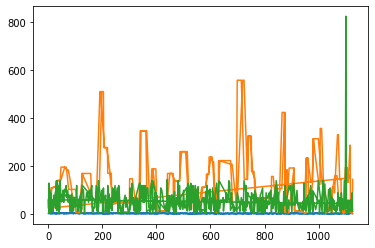

In [116]:
# Plot the original data
result_df["Rooms"].plot(), result_df["crime_C_average"].plot(), result_df["Age"].plot()

(<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>)

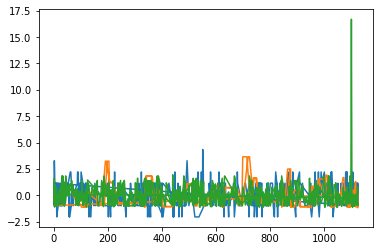

In [117]:
# Plot the standardized data 
result_df["Rooms_scaled"].plot(), result_df["CrC_scaled"].plot(), result_df["Age_scaled"].plot()

We can see that both the original data's plot and the standardized data's plot are the same shapes but they are shifted.

<div class="alert alert-block alert-info">
    
### 6.3. Min-Max Normalisation <a class="anchor" name="minmax"></a>

### MinMax Normalisation

In this section, some different types of normalization will be discussed using same required features such as Rooms, crime_C_average, Age, travel_min_to_CBD but the output could not find the travel min values so there will be three values used below.

In [118]:
# Using scikit-learn
minmax_scale = preprocessing.MinMaxScaler().fit(result_df[['Rooms', 'crime_C_average', 'Age']])
df_minmax = minmax_scale.transform(result_df[['Rooms', 'crime_C_average', 'Age']])
df_minmax[0:5]


array([[0.16666667, 0.04256595, 0.02314251],
       [0.5       , 0.19504396, 0.04506699],
       [0.33333333, 0.19504396, 0.04506699],
       [0.33333333, 0.20103917, 0.04506699],
       [0.5       , 0.20103917, 0.0816078 ]])

In [119]:
# Display values 
print('Min-value after min-max scaling:\nRooms = {:.2f}, Crime C average = {:.2f}, Property Age = {:.2f}'
      .format(df_minmax[:,0].min(), df_minmax[:,1].min(), df_minmax[:,2].min()))
print('\nMax-value after min-max scaling:\nRooms = {:.2f}, Crime C average = {:.2f}, Property Age = {:.2f}'
      .format(df_minmax[:,0].max(), df_minmax[:,1].max(), df_minmax[:,2].max()))


Min-value after min-max scaling:
Rooms = 0.00, Crime C average = 0.00, Property Age = 0.00

Max-value after min-max scaling:
Rooms = 1.00, Crime C average = 1.00, Property Age = 1.00


<div class="alert alert-block alert-info">
    
### 6.4. Data Transformation <a class="anchor" name="trans"></a>



This part will display data transformation, specifically data with right skew (positive skew) will be shown. We also investigate different types of transformation, including root transformation, square power transformation, lof transformation.

<div class="alert alert-block alert-info">
    
#### 6.4.1 Root Transformation  <a class="anchor" name="t1"></a>



In [120]:
# Find the square root values for each row in the column of Rooms 
result_df['rooms_trans'] = np.sqrt((result_df['Rooms']))
result_df.head(3)


,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,...,travel_min_to_CBD,over_priced?,crime_A_average,crime_B_average,crime_C_average,Rooms_scaled,CrC_scaled,Travelmin_scaled,Age_scaled,rooms_trans
7,ID272274930,11/33 Rankins Rd,2,u,666000.0,13/08/2016,1.0,2.0,1111.0,21.0,...,0,False,37.045455,154.333333,24.666667,-0.981745,-0.974198,0.0,-0.722936,1.414214
13,ID972513460,73 Victoria St,4,h,1815000.0,10/08/2016,3.0,2.0,321.0,39.0,...,0,True,130.782609,762.750000,109.444444,1.148657,-0.237649,0.0,-0.332166,2.000000
15,ID238669941,2/20 Victoria St,3,u,890000.0,12/03/2016,1.0,3.0,0.0,39.0,...,0,False,130.782609,762.750000,109.444444,0.083456,-0.237649,0.0,-0.332166,1.732051


In [121]:
# Find the square root values for each row in the column of crime C average 
result_df['crime_C_trans'] = np.sqrt((result_df['crime_C_average']))
result_df.head(3)

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,...,over_priced?,crime_A_average,crime_B_average,crime_C_average,Rooms_scaled,CrC_scaled,Travelmin_scaled,Age_scaled,rooms_trans,crime_C_trans
7,ID272274930,11/33 Rankins Rd,2,u,666000.0,13/08/2016,1.0,2.0,1111.0,21.0,...,False,37.045455,154.333333,24.666667,-0.981745,-0.974198,0.0,-0.722936,1.414214,4.966555
13,ID972513460,73 Victoria St,4,h,1815000.0,10/08/2016,3.0,2.0,321.0,39.0,...,True,130.782609,762.750000,109.444444,1.148657,-0.237649,0.0,-0.332166,2.000000,10.461570
15,ID238669941,2/20 Victoria St,3,u,890000.0,12/03/2016,1.0,3.0,0.0,39.0,...,False,130.782609,762.750000,109.444444,0.083456,-0.237649,0.0,-0.332166,1.732051,10.461570


In [122]:
## Find the square root values for each row in the column of Age 
result_df['property_age_trans'] = np.sqrt((result_df['Age']))
result_df.head(3)

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,...,crime_A_average,crime_B_average,crime_C_average,Rooms_scaled,CrC_scaled,Travelmin_scaled,Age_scaled,rooms_trans,crime_C_trans,property_age_trans
7,ID272274930,11/33 Rankins Rd,2,u,666000.0,13/08/2016,1.0,2.0,1111.0,21.0,...,37.045455,154.333333,24.666667,-0.981745,-0.974198,0.0,-0.722936,1.414214,4.966555,4.582576
13,ID972513460,73 Victoria St,4,h,1815000.0,10/08/2016,3.0,2.0,321.0,39.0,...,130.782609,762.750000,109.444444,1.148657,-0.237649,0.0,-0.332166,2.000000,10.461570,6.244998
15,ID238669941,2/20 Victoria St,3,u,890000.0,12/03/2016,1.0,3.0,0.0,39.0,...,130.782609,762.750000,109.444444,0.083456,-0.237649,0.0,-0.332166,1.732051,10.461570,6.244998


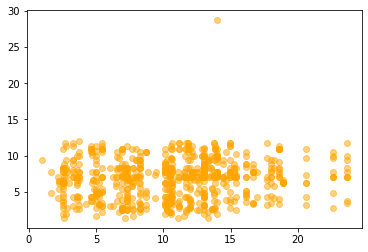

In [123]:
# Plot the to see data transformation used by square root 
plt.scatter(x = result_df.crime_C_trans, y = result_df.property_age_trans, alpha = 0.5, color = 'orange')

<div class="alert alert-block alert-info">
    
#### 6.4.2 Square Power Transformation  <a class="anchor" name="t2"></a>




In [124]:
# Find the square power values for Rooms column 
result_df['rooms_trans'] = result_df['Rooms'].pow(2)
result_df.head(3)

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,...,crime_A_average,crime_B_average,crime_C_average,Rooms_scaled,CrC_scaled,Travelmin_scaled,Age_scaled,rooms_trans,crime_C_trans,property_age_trans
7,ID272274930,11/33 Rankins Rd,2,u,666000.0,13/08/2016,1.0,2.0,1111.0,21.0,...,37.045455,154.333333,24.666667,-0.981745,-0.974198,0.0,-0.722936,4,4.966555,4.582576
13,ID972513460,73 Victoria St,4,h,1815000.0,10/08/2016,3.0,2.0,321.0,39.0,...,130.782609,762.750000,109.444444,1.148657,-0.237649,0.0,-0.332166,16,10.461570,6.244998
15,ID238669941,2/20 Victoria St,3,u,890000.0,12/03/2016,1.0,3.0,0.0,39.0,...,130.782609,762.750000,109.444444,0.083456,-0.237649,0.0,-0.332166,9,10.461570,6.244998


In [125]:
# Find the square power values for crime C average column
result_df['crime_C_trans'] = result_df['crime_C_average'].pow(2)
result_df.head(3)

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,...,crime_A_average,crime_B_average,crime_C_average,Rooms_scaled,CrC_scaled,Travelmin_scaled,Age_scaled,rooms_trans,crime_C_trans,property_age_trans
7,ID272274930,11/33 Rankins Rd,2,u,666000.0,13/08/2016,1.0,2.0,1111.0,21.0,...,37.045455,154.333333,24.666667,-0.981745,-0.974198,0.0,-0.722936,4,608.444444,4.582576
13,ID972513460,73 Victoria St,4,h,1815000.0,10/08/2016,3.0,2.0,321.0,39.0,...,130.782609,762.750000,109.444444,1.148657,-0.237649,0.0,-0.332166,16,11978.086420,6.244998
15,ID238669941,2/20 Victoria St,3,u,890000.0,12/03/2016,1.0,3.0,0.0,39.0,...,130.782609,762.750000,109.444444,0.083456,-0.237649,0.0,-0.332166,9,11978.086420,6.244998


In [126]:
# Find the square power values for Age column
result_df['property_age_trans'] = result_df['Age'].pow(2)
result_df.head(3)

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,...,crime_A_average,crime_B_average,crime_C_average,Rooms_scaled,CrC_scaled,Travelmin_scaled,Age_scaled,rooms_trans,crime_C_trans,property_age_trans
7,ID272274930,11/33 Rankins Rd,2,u,666000.0,13/08/2016,1.0,2.0,1111.0,21.0,...,37.045455,154.333333,24.666667,-0.981745,-0.974198,0.0,-0.722936,4,608.444444,441.0
13,ID972513460,73 Victoria St,4,h,1815000.0,10/08/2016,3.0,2.0,321.0,39.0,...,130.782609,762.750000,109.444444,1.148657,-0.237649,0.0,-0.332166,16,11978.086420,1521.0
15,ID238669941,2/20 Victoria St,3,u,890000.0,12/03/2016,1.0,3.0,0.0,39.0,...,130.782609,762.750000,109.444444,0.083456,-0.237649,0.0,-0.332166,9,11978.086420,1521.0


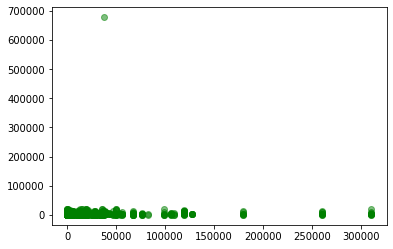

In [127]:
# Plot to see how data changes by using square power 
plt.scatter(x = result_df.crime_C_trans, y = result_df.property_age_trans, alpha = 0.5, color = 'green')

<div class="alert alert-block alert-info">
    
#### 6.4.3 Log Transformation  <a class="anchor" name="t3"></a>




In [128]:
# Transform data using log for Rooms column 
result_df['rooms_trans'] = np.log(result_df['Rooms'])
result_df.head(3)

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,...,crime_A_average,crime_B_average,crime_C_average,Rooms_scaled,CrC_scaled,Travelmin_scaled,Age_scaled,rooms_trans,crime_C_trans,property_age_trans
7,ID272274930,11/33 Rankins Rd,2,u,666000.0,13/08/2016,1.0,2.0,1111.0,21.0,...,37.045455,154.333333,24.666667,-0.981745,-0.974198,0.0,-0.722936,0.693147,608.444444,441.0
13,ID972513460,73 Victoria St,4,h,1815000.0,10/08/2016,3.0,2.0,321.0,39.0,...,130.782609,762.750000,109.444444,1.148657,-0.237649,0.0,-0.332166,1.386294,11978.086420,1521.0
15,ID238669941,2/20 Victoria St,3,u,890000.0,12/03/2016,1.0,3.0,0.0,39.0,...,130.782609,762.750000,109.444444,0.083456,-0.237649,0.0,-0.332166,1.098612,11978.086420,1521.0


In [129]:
# Transform data using log for crime_C_average column 
result_df['crime_C_trans'] = np.log(result_df['crime_C_average'])
result_df.head(3)

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,...,crime_A_average,crime_B_average,crime_C_average,Rooms_scaled,CrC_scaled,Travelmin_scaled,Age_scaled,rooms_trans,crime_C_trans,property_age_trans
7,ID272274930,11/33 Rankins Rd,2,u,666000.0,13/08/2016,1.0,2.0,1111.0,21.0,...,37.045455,154.333333,24.666667,-0.981745,-0.974198,0.0,-0.722936,0.693147,3.205453,441.0
13,ID972513460,73 Victoria St,4,h,1815000.0,10/08/2016,3.0,2.0,321.0,39.0,...,130.782609,762.750000,109.444444,1.148657,-0.237649,0.0,-0.332166,1.386294,4.695417,1521.0
15,ID238669941,2/20 Victoria St,3,u,890000.0,12/03/2016,1.0,3.0,0.0,39.0,...,130.782609,762.750000,109.444444,0.083456,-0.237649,0.0,-0.332166,1.098612,4.695417,1521.0


In [130]:
# Transform data using log for Age column 
result_df['property_age_trans'] = np.log(result_df['Age'])
result_df.head(3)

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,...,crime_A_average,crime_B_average,crime_C_average,Rooms_scaled,CrC_scaled,Travelmin_scaled,Age_scaled,rooms_trans,crime_C_trans,property_age_trans
7,ID272274930,11/33 Rankins Rd,2,u,666000.0,13/08/2016,1.0,2.0,1111.0,21.0,...,37.045455,154.333333,24.666667,-0.981745,-0.974198,0.0,-0.722936,0.693147,3.205453,3.044522
13,ID972513460,73 Victoria St,4,h,1815000.0,10/08/2016,3.0,2.0,321.0,39.0,...,130.782609,762.750000,109.444444,1.148657,-0.237649,0.0,-0.332166,1.386294,4.695417,3.663562
15,ID238669941,2/20 Victoria St,3,u,890000.0,12/03/2016,1.0,3.0,0.0,39.0,...,130.782609,762.750000,109.444444,0.083456,-0.237649,0.0,-0.332166,1.098612,4.695417,3.663562


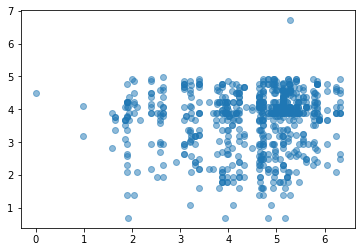

In [131]:
#Plot the data change by using log transformation 
plt.scatter(x = result_df.crime_C_trans, y = result_df.property_age_trans, alpha = 0.5)

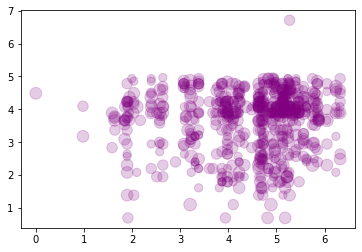

In [132]:
# This plot is similar the above plot but it is zoomed bigger using room size
plt.scatter(result_df.crime_C_trans, result_df.property_age_trans, s=result_df.rooms_trans*100,
           alpha = 0.2, color = 'purple')

After trying different transformation methods, the best transformation is log transformation because out data is positively skewed. Additionally, we have to make the data spread out at lower values. The root transformation above is also fine but log transformation is more suitable and better for normality. 

<div class="alert alert-block alert-info">
    
### 6.5. Testing Linear Model <a class="anchor" name="linear"></a>




This section will display linear model created by using 2 transformation methods above, the log transformation and the root transformation to see how they are different and which one can be better in our case. The linear model is created as the dependent variable is Price and the predictors include Rooms, crime_C_average and Age.

In [133]:
# This is log transformation 
# Create one more log values for Price column 
result_df['price_trans'] = np.log(result_df['Price'])
result_df['rooms_trans'] = np.log(result_df['Rooms'])
result_df['crime_C_trans'] = np.log(result_df['crime_C_average'])
result_df['property_age_trans'] = np.log(result_df['Age'])

In [134]:
# Split dataset into training set  and testing set
y = result_df['price_trans']
x = result_df[['rooms_trans', 'crime_C_trans', 'property_age_trans']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

In [135]:
# Build the linear model
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [136]:
#Display coefficient values in the linear model
feature_names = x.columns
model_coefficients = regressor.coef_

coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coefficient value'])
print(coefficients_df)

                    Coefficient value
rooms_trans                  0.887887
crime_C_trans                0.032645
property_age_trans           0.105046


The coefficient value mean that for a unit increase in number of rooms, there will be an increase of 0.887 in price of that property. Similary, there is the increase of price if the age of property is older as 0.1. By looking at these values, we can see, accoring to our linear model, the number of rooms in the property has high 

In [137]:
# Display checking metrics to evaluate the model
y_pred = regressor.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.34
Mean squared error: 0.19
Root mean squared error: 0.44


In [138]:
# Find R square 
actual_minus_predicted = sum((y_test - y_pred)**2)
actual_minus_actual_mean = sum((y_test - y_test.mean())**2)
r2 = 1 - actual_minus_predicted/actual_minus_actual_mean
print('R²:', r2)

R²: 0.3765055273835145


Looking at the RMSE, which is 0.44. It means our model can get error prediction by adding or subtracting 0.44 from the actual value. This number is good because it comes to 0. The R² is 0.376, means the current model explains only nearly 38% of our testing data.

-----------

In [139]:
# This is linear model using square root transformation
# Create one more transformation for Price column 
result_df['price_trans'] = np.sqrt((result_df['Price']))

In [140]:
# Create square root transformation values 
result_df['rooms_trans'] = np.sqrt((result_df['Rooms']))
result_df['crime_C_trans'] = np.sqrt((result_df['crime_C_average']))
result_df['property_age_trans'] = np.sqrt((result_df['Age']))

In [141]:
# Split dataset into training set and testign set 
y = result_df['price_trans']
x = result_df[['rooms_trans', 'crime_C_trans', 'property_age_trans']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

In [142]:
# Create the linear model
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [143]:
# Display coefficient values in the model
feature_names = x.columns
model_coefficients = regressor.coef_

coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coefficient value'])
print(coefficients_df)

                    Coefficient value
rooms_trans                540.440100
crime_C_trans                2.619224
property_age_trans          22.157667


In [144]:
# Print out metrics for checking and evaluating the model 
y_pred = regressor.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 176.78
Mean squared error: 59846.38
Root mean squared error: 244.64


In [145]:
# Find R square 
actual_minus_predicted = sum((y_test - y_pred)**2)
actual_minus_actual_mean = sum((y_test - y_test.mean())**2)
r2 = 1 - actual_minus_predicted/actual_minus_actual_mean
print('R²:', r2)

R²: 0.339656381784603


Looking at the results of linear model using square root transformation values, the metrics are very irregular and not good since the RMSE got even 244.64 and the R² also had smaller value, with 33.9% compared to the linear model using log transformation, with 37.6%.

<div class="alert alert-block alert-warning"> 

## 7. Summary <a class="anchor" name="sum"></a>

</div>

In general, data integration is the process of consolidating data from different sources in order to achieve the ultimate goals of analyzing data to meet the tasks. This assessment provides a good chance to observe how data can be used from multiple formats and implement them into dataframes. Moreover, data transformation can help to convert datasets into a suitable structure that will be manipulated to build models and algorithm. By applying different methods, the log transformation can be considered as the most suitable for dataset in this assessment and the linear model built by using log transformation method is also better than the square root method. 

<div class="alert alert-block alert-warning"> 

## 8. References <a class="anchor" name="Ref"></a>

</div>

[1] Linear Regression in Python with Scikit-Learn, https://stackabuse.com/linear-regression-in-python-with-scikit-learn/  , Assessed 01/11/2022.

[2] Turning a dictionary with one key and multiple values to pandas dataframe, https://stackoverflow.com/questions/68705455/turning-a-dictionary-with-one-key-and-multiple-values-to-pandas-dataframe, Assessed 01/11/2022.

[3] Strip / trim all strings of a dataframe, https://stackoverflow.com/questions/40950310/strip-trim-all-strings-of-a-dataframe, Assessed 01/11/2022.

[4] Haversine Formula in Python, https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points, Assessed 01/11/2022.